In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Thyroid_Diff.csv")
df.head(50)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [6]:
df.duplicated().sum()

np.int64(19)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

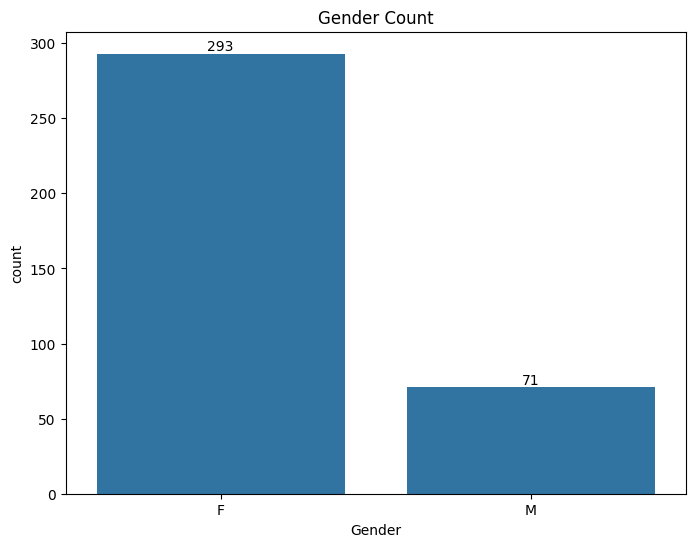

In [10]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Gender" , data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Count")
plt.show()

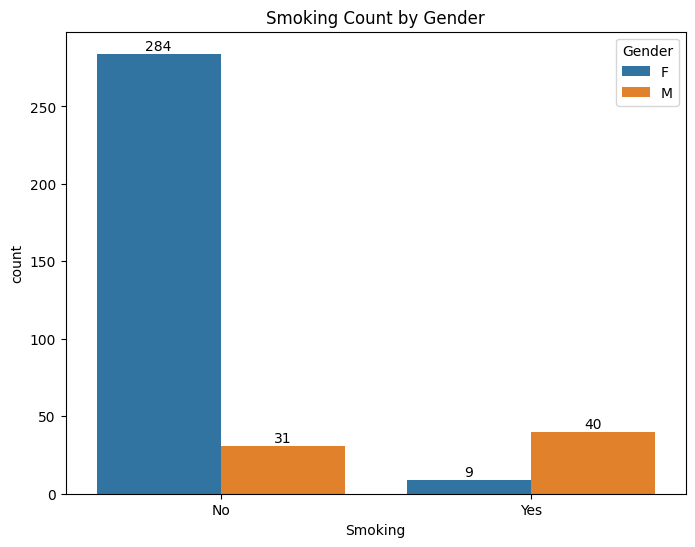

In [11]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Smoking" , data = df, hue= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Smoking Count by Gender")
plt.show()

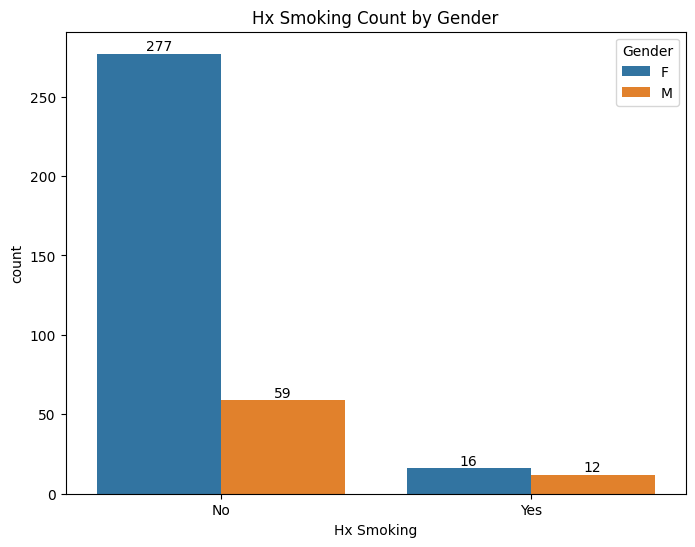

In [12]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Hx Smoking" , data = df, hue= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Hx Smoking Count by Gender")
plt.show()

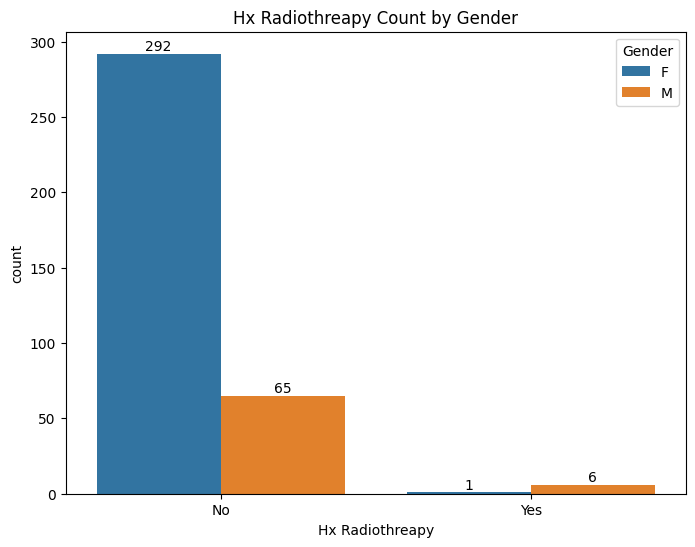

In [13]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Hx Radiothreapy" , data = df, hue= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Hx Radiothreapy Count by Gender")
plt.show()

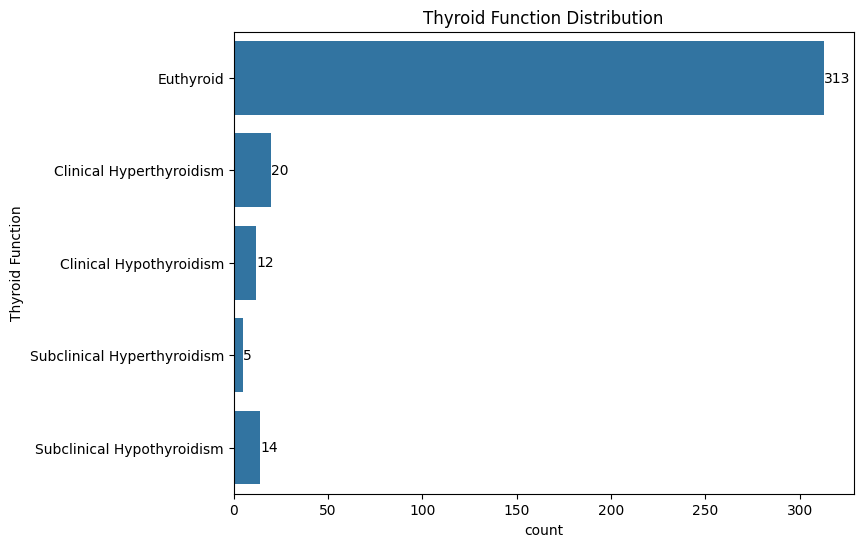

In [14]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y = "Thyroid Function" , data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Thyroid Function Distribution")
plt.show()

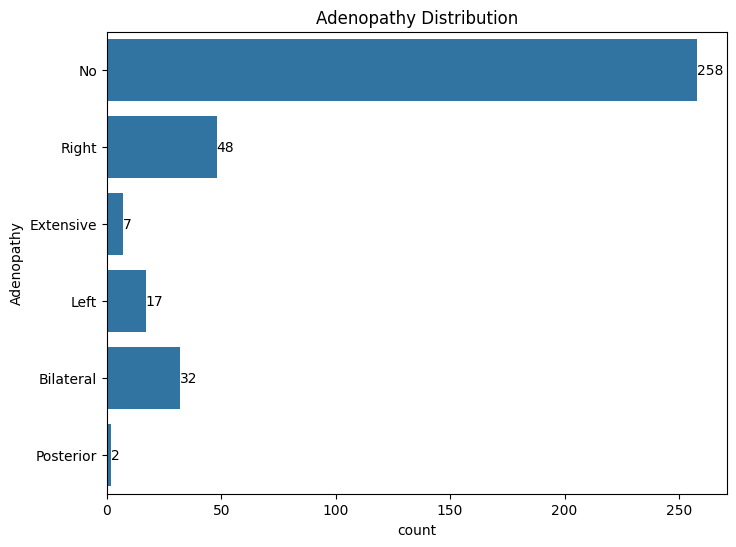

In [15]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y = "Adenopathy" , data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Adenopathy Distribution")
plt.show()

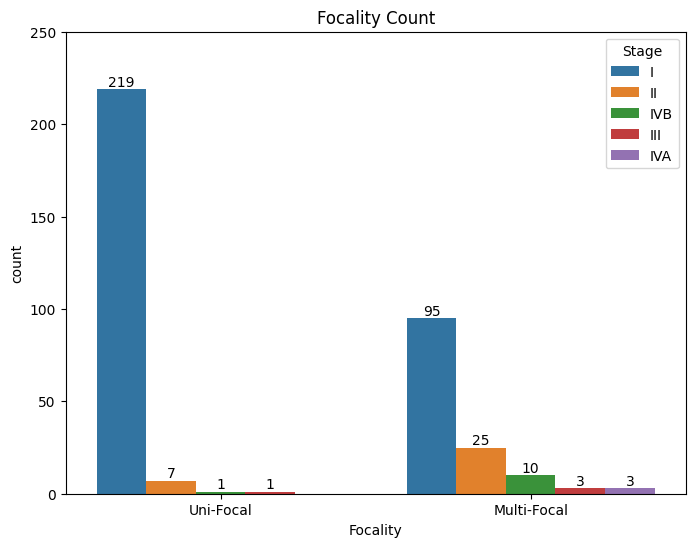

In [16]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Focality" , data = df, hue = "Stage")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Focality Count")
plt.ylim(0, 250)
plt.show()


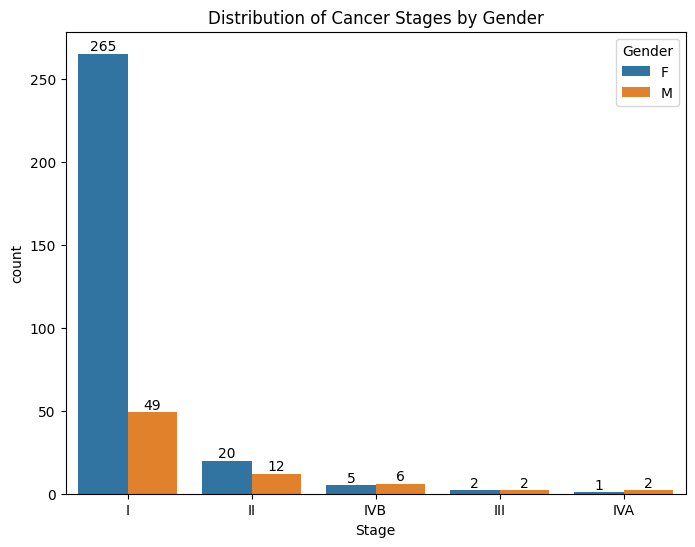

In [17]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Stage" , data = df, hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Cancer Stages by Gender")
plt.show()

In [18]:
risk_counts = df.groupby(["Thyroid Function", "Risk"]).size().unstack()
risk_counts

Risk,High,Intermediate,Low
Thyroid Function,,,
Clinical Hyperthyroidism,2.0,4.0,14.0
Clinical Hypothyroidism,NaN,3.0,9.0
Euthyroid,28.0,88.0,197.0
Subclinical Hyperthyroidism,NaN,NaN,5.0
Subclinical Hypothyroidism,2.0,7.0,5.0


<Figure size 1200x800 with 0 Axes>

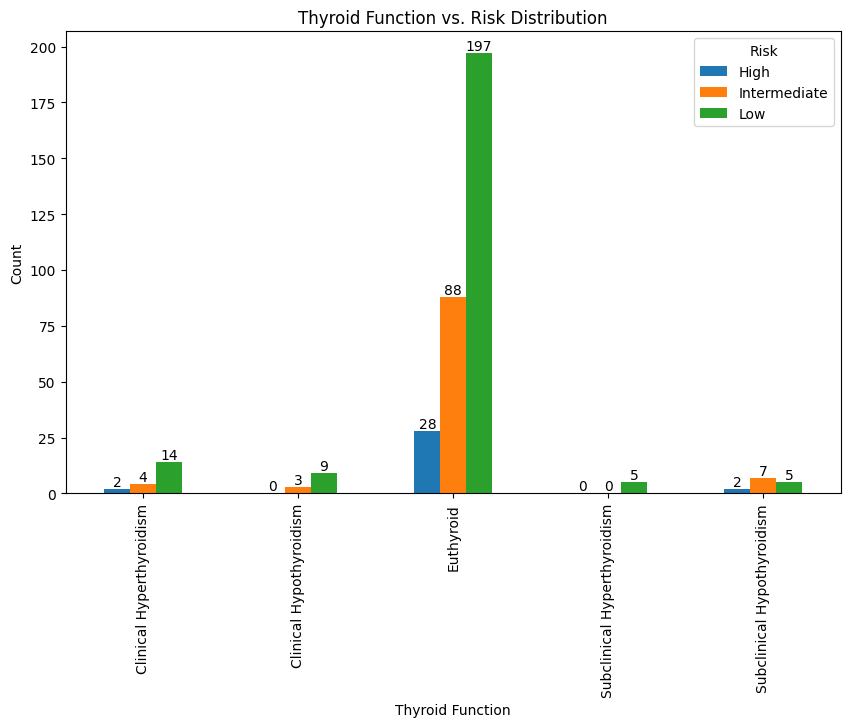

In [19]:
plt.figure(figsize=(12, 8))
ax = risk_counts.plot(kind='bar', figsize=(10, 6))
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Thyroid Function vs. Risk Distribution")
plt.xlabel("Thyroid Function")
plt.ylabel("Count")
plt.show()

In [20]:
risk_stage_counts = df.groupby(["Thyroid Function", "Stage"]).size().unstack()
risk_stage_counts

Stage,I,II,III,IVA,IVB
Thyroid Function,,,,,
Clinical Hyperthyroidism,17.0,1.0,NaN,1.0,1.0
Clinical Hypothyroidism,12.0,NaN,NaN,NaN,NaN
Euthyroid,272.0,28.0,2.0,1.0,10.0
Subclinical Hyperthyroidism,5.0,NaN,NaN,NaN,NaN
Subclinical Hypothyroidism,8.0,3.0,2.0,1.0,NaN


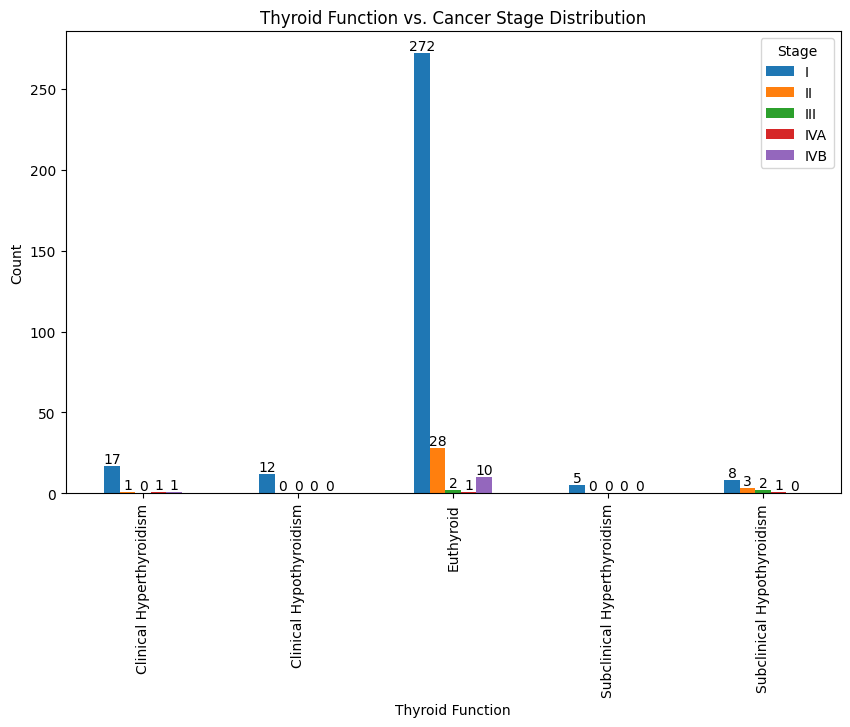

In [21]:
ax = risk_stage_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Thyroid Function vs. Cancer Stage Distribution")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Thyroid Function")
plt.ylabel("Count")
plt.show()

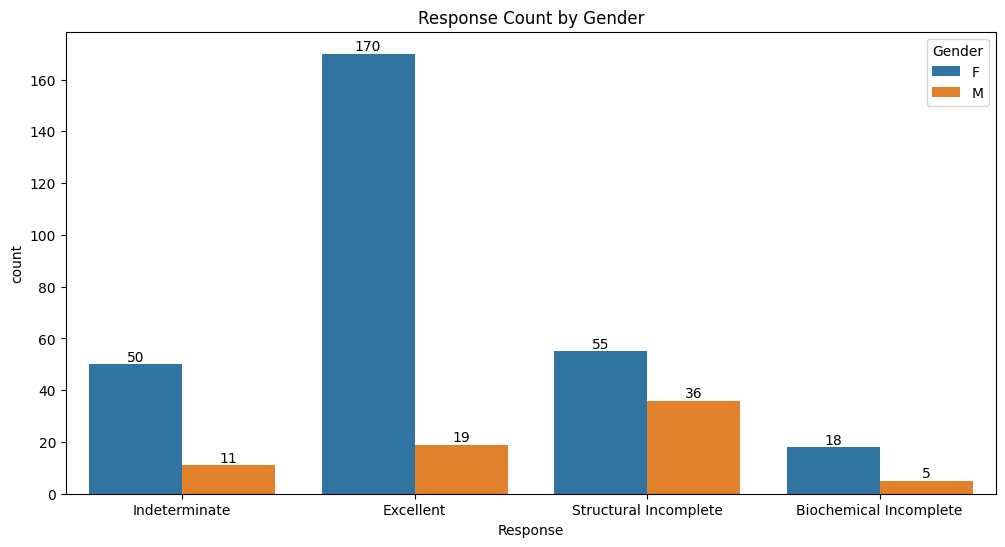

In [22]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x = "Response" , data = df, hue= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Response Count by Gender")
plt.show()

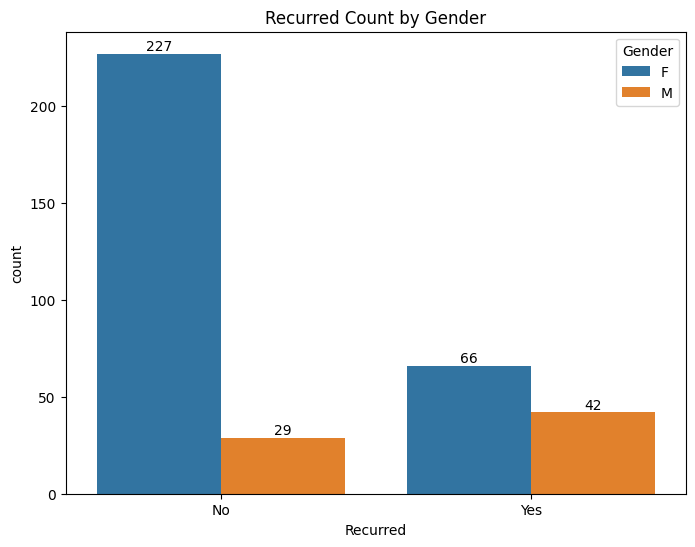

In [23]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "Recurred" , data = df, hue= "Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Recurred Count by Gender")
plt.show()

In [24]:
df.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [25]:
df["Age_Category"] = pd.cut(df["Age"],bins=[15,24,34,44,54,64,74,82], retbins=True, 
                           labels=["Adolescents & Young Adults","Young Adults",
                                  "Early Middle Age","Middle Age","Late Middle Age",
                                  "Early Senior","Late Senior"])[0]

In [26]:
df.head(50)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Category
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,Young Adults
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Young Adults
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Young Adults
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Late Middle Age
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,Late Middle Age
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No,Middle Age
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Early Middle Age
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Middle Age
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Middle Age
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Early Middle Age


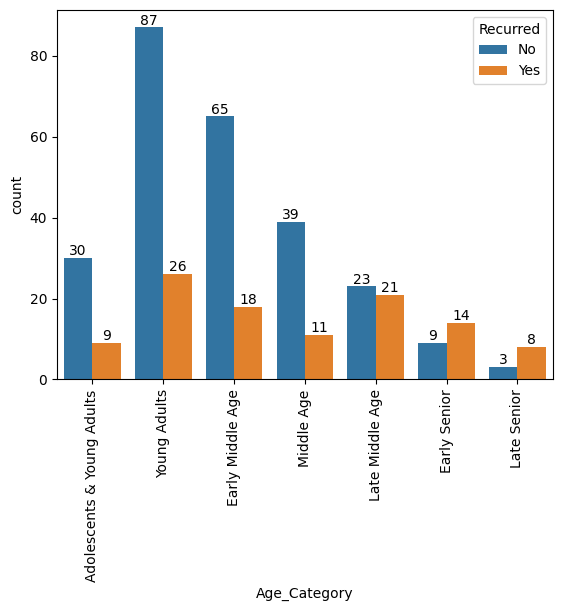

In [27]:
ax = sns.countplot(df, x="Age_Category", hue="Recurred")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

In [28]:
df["Age_Category"].value_counts().reset_index()

,Age_Category,count
0,Young Adults,113
1,Early Middle Age,83
2,Middle Age,50
3,Late Middle Age,44
4,Adolescents & Young Adults,39
5,Early Senior,23
6,Late Senior,11


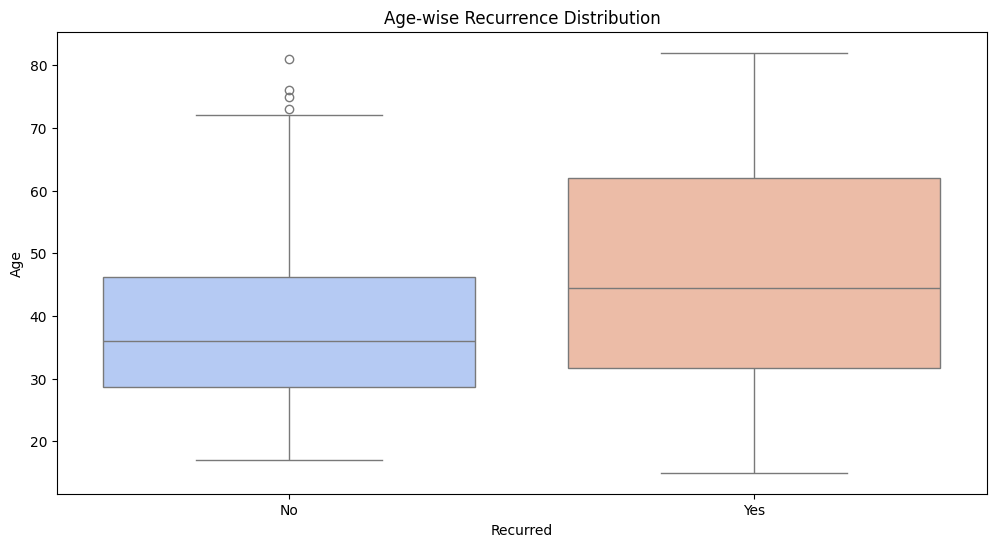

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Recurred', y='Age', data=df, palette="coolwarm")
plt.title("Age-wise Recurrence Distribution")
plt.show()

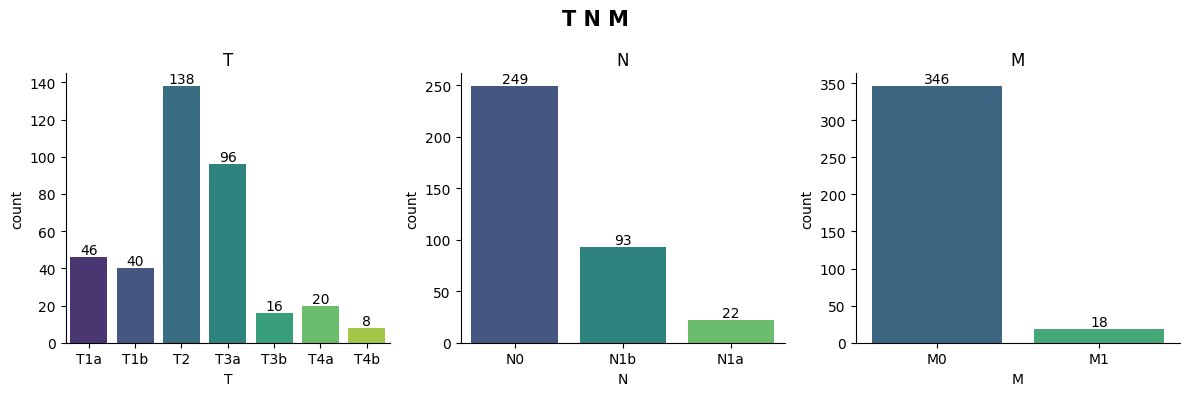

In [30]:
plt.figure(figsize=(12,4))
plt.suptitle("T N M", fontsize=15, fontweight="bold")
for z,i in enumerate(df[["T", "N", "M"]]):
    plt.subplot(1, 3, z+1)  
    ax = sns.countplot(x=i, data=df, palette="viridis")
    for bars in ax.containers:
        ax.bar_label(bars)
    sns.despine(top=True, right=True)    
    plt.title(i)
plt.tight_layout()    

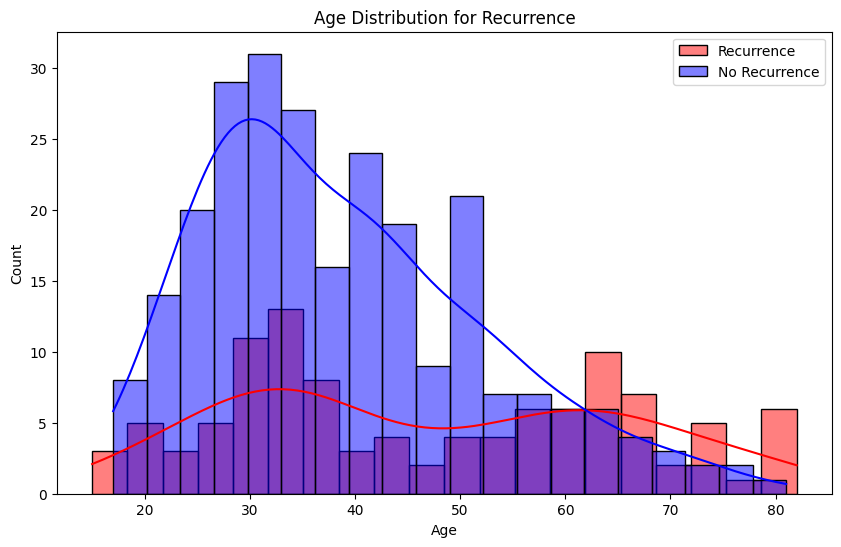

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Recurred'] == 'Yes']['Age'], bins=20, kde=True, color='red', label="Recurrence")
sns.histplot(df[df['Recurred'] == 'No']['Age'], bins=20, kde=True, color='blue', label="No Recurrence")
plt.legend()
plt.title("Age Distribution for Recurrence")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

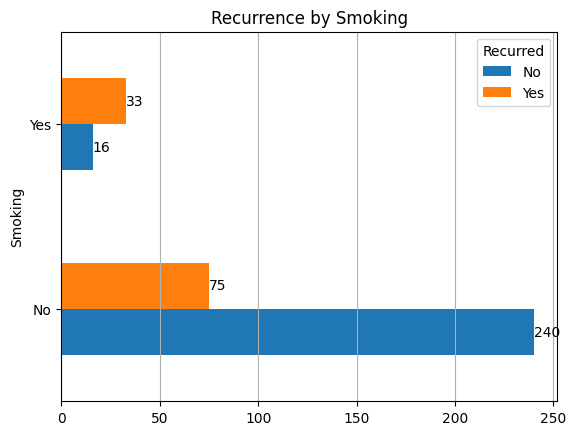

In [32]:
ax = pd.crosstab(df["Smoking"], df["Recurred"]).plot.barh()
plt.grid(axis = "x")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Recurrence by Smoking")
plt.show()

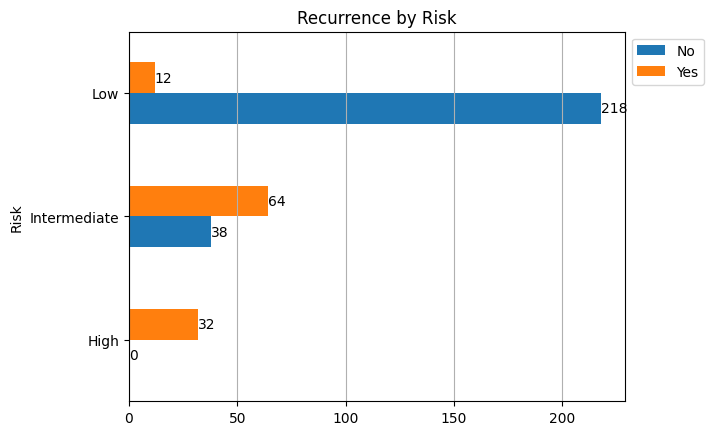

In [33]:
ax = pd.crosstab(df["Risk"], df["Recurred"]).plot.barh()
plt.grid(axis = "x")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Recurrence by Risk")
plt.legend(bbox_to_anchor = (1, 1), loc = "upper left")
plt.show()

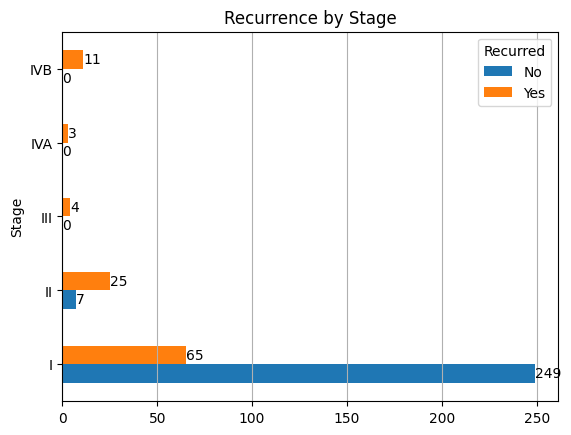

In [34]:
ax = pd.crosstab(df["Stage"], df["Recurred"]).plot.barh()
plt.grid(axis = "x")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Recurrence by Stage")
plt.show()

In [35]:
df.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Category
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,Young Adults
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Young Adults


In [36]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred',
       'Age_Category'],
      dtype='object')

In [37]:
cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function','Physical Examination', 'Adenopathy', 'Pathology']
for i in df[cols]:
    print(df[i].value_counts())
    print("="*30)

Gender
F    293
M     71
Name: count, dtype: int64
Smoking
No     315
Yes     49
Name: count, dtype: int64
Hx Smoking
No     336
Yes     28
Name: count, dtype: int64
Hx Radiothreapy
No     357
Yes      7
Name: count, dtype: int64
Thyroid Function
Euthyroid                      313
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64
Physical Examination
Multinodular goiter            135
Single nodular goiter-right    127
Single nodular goiter-left      88
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64
Adenopathy
No           258
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64
Pathology
Papillary         271
Micropapillary     45
Follicular         28
Hurthel cell       20
Name: count, dtype: int64


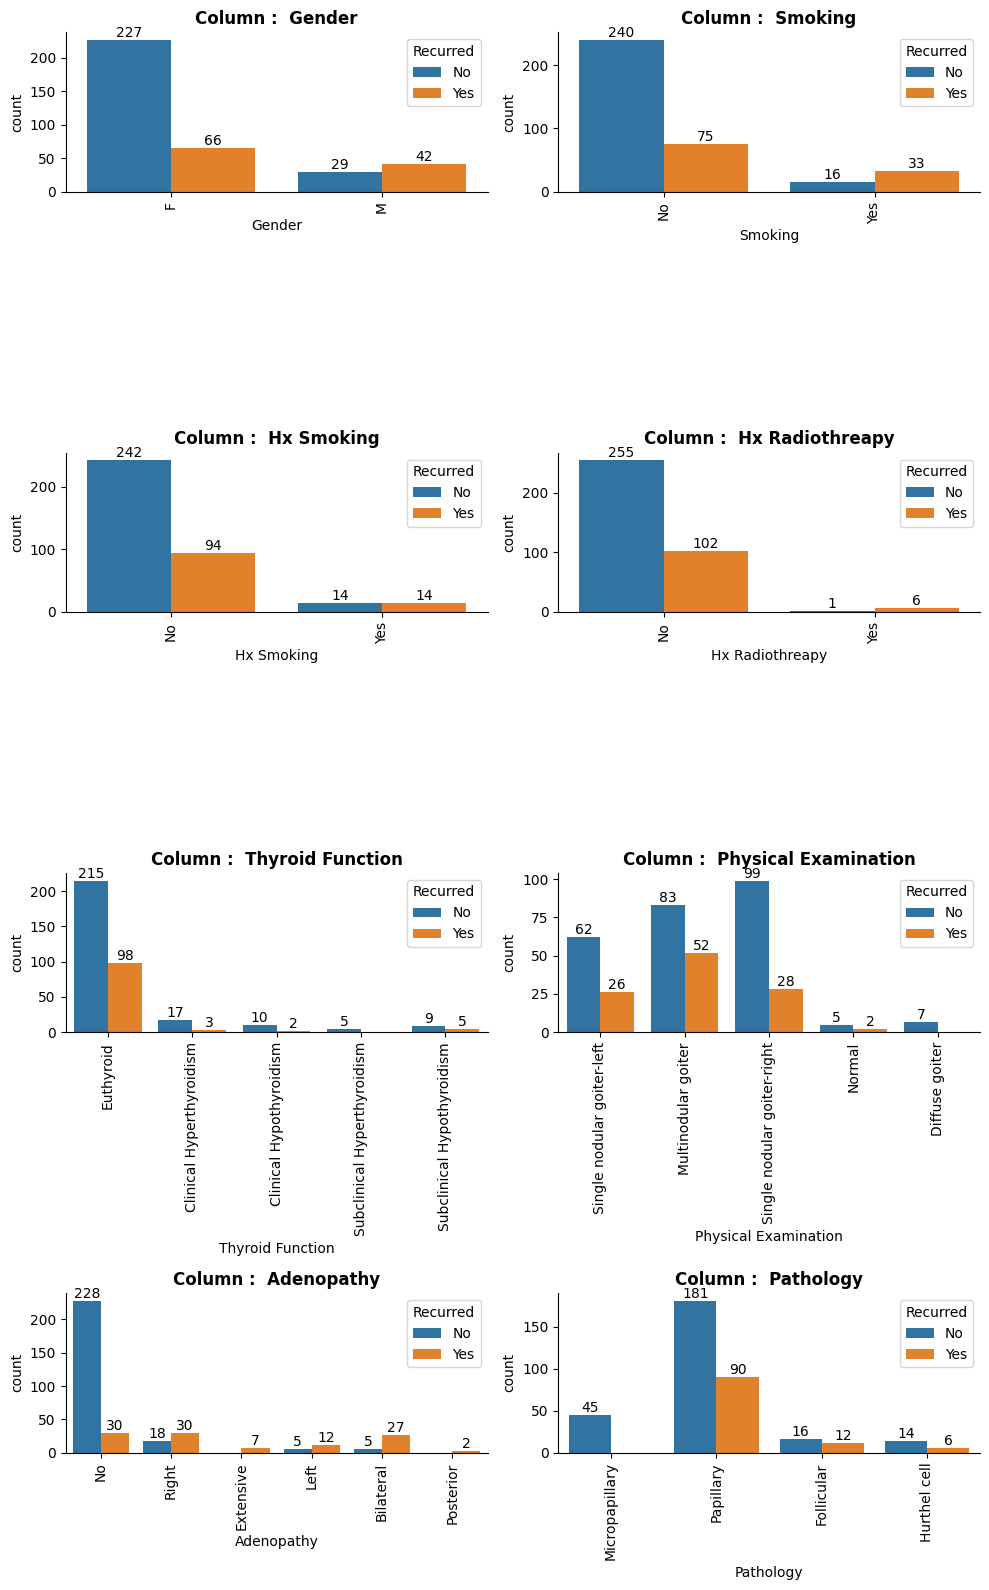

In [38]:
plt.figure(figsize=(10, 16))
for z, i in enumerate(df[cols]):
    plt.subplot(4, 2,z+1)
    ax = sns.countplot(df, x=i, hue="Recurred")
    for bars in ax.containers:
        ax.bar_label(bars)
    sns.despine(top=True, right=True)
    plt.xticks(rotation=90)
    plt.title(f"Column :  {i}", fontweight="bold", fontsize=12)
plt.tight_layout()    

In [39]:
age = df["Age_Category"].value_counts().reset_index()
age

,Age_Category,count
0,Young Adults,113
1,Early Middle Age,83
2,Middle Age,50
3,Late Middle Age,44
4,Adolescents & Young Adults,39
5,Early Senior,23
6,Late Senior,11


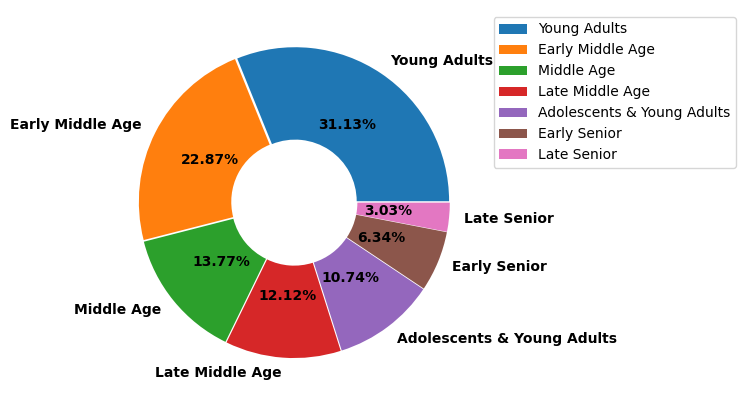

In [40]:
plt.figure(figsize=(12,5))
plt.pie(age["count"], autopct="%.2f%%",labels=age["Age_Category"] ,
        wedgeprops={"width":0.6}, explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01], textprops={"fontweight":"bold"})
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

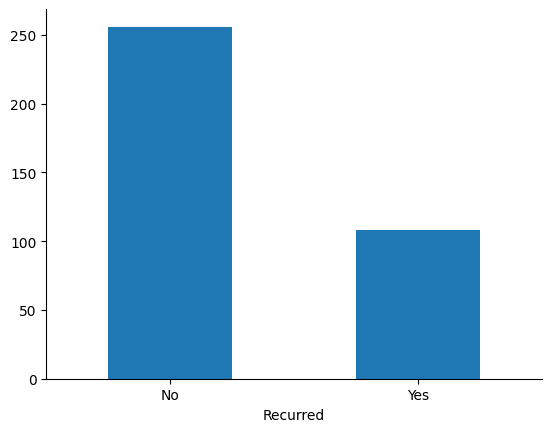

In [41]:
df["Recurred"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
sns.despine(top = True, right = True)
plt.show()

In [42]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Age_Category
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,Young Adults
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Young Adults
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Young Adults
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Late Middle Age
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,Late Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,Early Senior
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,Late Senior
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,Early Senior
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,Late Middle Age


In [43]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred',
       'Age_Category'],
      dtype='object')

In [44]:
ohe_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'Response']

In [45]:
ohe = OneHotEncoder(drop = "first")

In [46]:
encoded_cols = ohe.fit_transform(df[ohe_cols])

In [47]:
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=ohe.get_feature_names_out())

In [48]:
encoded_df

,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,...,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
360,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
362,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   364 non-null    int64   
 1   Gender                364 non-null    object  
 2   Smoking               364 non-null    object  
 3   Hx Smoking            364 non-null    object  
 4   Hx Radiothreapy       364 non-null    object  
 5   Thyroid Function      364 non-null    object  
 6   Physical Examination  364 non-null    object  
 7   Adenopathy            364 non-null    object  
 8   Pathology             364 non-null    object  
 9   Focality              364 non-null    object  
 10  Risk                  364 non-null    object  
 11  T                     364 non-null    object  
 12  N                     364 non-null    object  
 13  M                     364 non-null    object  
 14  Stage                 364 non-null    object  
 15  Response   

In [50]:
df.drop("Age_Category", axis=1, inplace=True)

In [51]:
df.reset_index(drop=True, inplace=True)

In [52]:
new_df = pd.concat((df, encoded_df), axis=1)

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               364 non-null    int64  
 1   Gender                                            364 non-null    object 
 2   Smoking                                           364 non-null    object 
 3   Hx Smoking                                        364 non-null    object 
 4   Hx Radiothreapy                                   364 non-null    object 
 5   Thyroid Function                                  364 non-null    object 
 6   Physical Examination                              364 non-null    object 
 7   Adenopathy                                        364 non-null    object 
 8   Pathology                                         364 non-null    object 
 9   Focality             

In [54]:
new_df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
360,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
362,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
new_df.drop(ohe_cols, axis=1, inplace=True)

In [56]:
new_df

,Age,T,N,M,Stage,Recurred,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,...,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,T1a,N0,M0,I,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,34,T1a,N0,M0,I,No,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,30,T1a,N0,M0,I,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,62,T1a,N0,M0,I,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,62,T1a,N0,M0,I,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,T4b,N1b,M1,IVB,Yes,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
360,81,T4b,N1b,M1,IVB,Yes,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,72,T4b,N1b,M1,IVB,Yes,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
362,61,T4b,N1b,M0,IVA,Yes,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
ord_cols = ["T", "N", "M", "Stage"]
ord_cols

['T', 'N', 'M', 'Stage']

In [58]:
oe = OrdinalEncoder()

In [59]:
new_df[ord_cols] = oe.fit_transform(new_df[ord_cols])

In [60]:
new_df

,Age,T,N,M,Stage,Recurred,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,...,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,34,0.0,0.0,0.0,0.0,No,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,30,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,62,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,62,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,6.0,2.0,1.0,4.0,Yes,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
360,81,6.0,2.0,1.0,4.0,Yes,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,72,6.0,2.0,1.0,4.0,Yes,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
362,61,6.0,2.0,0.0,3.0,Yes,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
std_scl_col = ['Age']

In [62]:
std_sc = StandardScaler()

In [63]:
new_df[std_scl_col] = std_sc.fit_transform(new_df[std_scl_col])

In [64]:
le = LabelEncoder()

In [65]:
df["Recurred"] = le.fit_transform(df["Recurred"])

In [66]:
new_df

,Age,T,N,M,Stage,Recurred,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,...,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,-0.931780,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.474064,0.0,0.0,0.0,0.0,No,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-0.735616,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1.356803,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.356803,0.0,0.0,0.0,0.0,No,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2.010683,6.0,2.0,1.0,4.0,Yes,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
360,2.599176,6.0,2.0,1.0,4.0,Yes,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,2.010683,6.0,2.0,1.0,4.0,Yes,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
362,1.291414,6.0,2.0,0.0,3.0,Yes,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
new_df.isnull().sum()

Age                                                 0
T                                                   0
N                                                   0
M                                                   0
Stage                                               0
Recurred                                            0
Gender_M                                            0
Smoking_Yes                                         0
Hx Smoking_Yes                                      0
Hx Radiothreapy_Yes                                 0
Thyroid Function_Clinical Hypothyroidism            0
Thyroid Function_Euthyroid                          0
Thyroid Function_Subclinical Hyperthyroidism        0
Thyroid Function_Subclinical Hypothyroidism         0
Physical Examination_Multinodular goiter            0
Physical Examination_Normal                         0
Physical Examination_Single nodular goiter-left     0
Physical Examination_Single nodular goiter-right    0
Adenopathy_Extensive        

In [68]:
X = new_df.drop("Recurred", axis=1)
y = df["Recurred"]

In [69]:
X

,Age,T,N,M,Stage,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,...,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,-0.931780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.474064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-0.735616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1.356803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.356803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2.010683,6.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
360,2.599176,6.0,2.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
361,2.010683,6.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
362,1.291414,6.0,2.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
y

0      0
1      0
2      0
3      0
4      0
      ..
359    1
360    1
361    1
362    1
363    1
Name: Recurred, Length: 364, dtype: int64

In [71]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75)

In [80]:
models = [LogisticRegression(),
          DecisionTreeClassifier(max_depth=7), 
          RandomForestClassifier(max_depth=5), 
          BernoulliNB(), 
          AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5), n_estimators=100)]

In [81]:
for i in models:
    print("Model = ", i)
    i.fit(X_tr, y_tr)
    print("Training Score =", i.score(X_tr, y_tr))
    pred = i.predict(X_te)
    print("Testing Score =", accuracy_score(y_te, pred))
    print("Precision Score =", precision_score(y_te, pred))
    print("Recall Score =", recall_score(y_te, pred))
    print("F1 Score =", f1_score(y_te, pred))
    print("=="*50)

Model =  LogisticRegression()
Training Score = 0.9743589743589743
Testing Score = 0.945054945054945
Precision Score = 0.967741935483871
Recall Score = 0.8823529411764706
F1 Score = 0.9230769230769231
Model =  DecisionTreeClassifier(max_depth=7)
Training Score = 0.989010989010989
Testing Score = 0.945054945054945
Precision Score = 0.9142857142857143
Recall Score = 0.9411764705882353
F1 Score = 0.927536231884058
Model =  RandomForestClassifier(max_depth=5)
Training Score = 0.978021978021978
Testing Score = 0.9560439560439561
Precision Score = 1.0
Recall Score = 0.8823529411764706
F1 Score = 0.9375
Model =  BernoulliNB()
Training Score = 0.9010989010989011
Testing Score = 0.9010989010989011
Precision Score = 0.9032258064516129
Recall Score = 0.8235294117647058
F1 Score = 0.8615384615384616
Model =  AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5),
                   n_estimators=100)
Training Score = 1.0
Testing Score = 0.9560439560439561
Precision Score = 1.0
Recall Score